# Describing, visualising, and transforming data

### Introduction  

We will explore how to analyse and preprocess a numeric/tabular dataset to gain meaningful insights before applying machine learning models. Understanding your data is a crucial first step in any data science workflow, as it influences how well your models perform and generalise to unseen data. As you'll see, Data Science and Machine Learning are closely coupled.

We will cover three key aspects of data exploration and preparation:  

- *Describing the dataset* – We will generate statistical summaries, such as measures of central tendency (mean, median) and dispersion (variance, standard deviation), to understand the distribution of each feature. Additionally, we will examine missing values, outliers, and correlations between variables to identify patterns and potential preprocessing steps.  

- *Visualising the dataset* – Data visualisation helps us uncover hidden relationships, trends, and anomalies. We will use histograms, box plots, scatter plots, and correlation heatmaps to visually inspect distributions, detect skewness, and understand feature interactions.    

After working through this practical, you will have a structured approach to exploring, visualising, and preparing numeric data for analysis. This process is essential for making informed decisions in machine learning, as the quality of your input data directly impacts model accuracy and reliability.

### Installing Python libraries

In [1]:
%pip install --upgrade pip

%pip install pandas seaborn scikit-learn -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Descriptive statistics

Descriptive statistics help us quickly understand what our data looks like. Instead of going through thousands of individual numbers, we can use these summaries to spot patterns, unusual values, and check whether the data behaves in the way we expect.

Descriptive statistics are important in data analysis because they help us:

- *Summarise large amounts of data simply*: Rather than examining every single value, we can look at averages and ranges to get a clear overview.

- *Spot problems with the data*: By checking things like the average, spread, and typical values, we can find missing information, strange results, or mistakes in the data.

- *Understand how the data is spread out*: Looking at the shape of the data helps us see if most values are similar or if there’s a big range. It also shows whether the data follows common patterns, like a bell curve (normal distribution).

- *Identify unusual or extreme values*: Very high or low numbers might be errors or rare events that we need to pay attention to before using the data in models.

- *Prepare the data for further analysis*: Knowing how the data behaves helps us decide what changes we might need to make—like adjusting values or removing features—to improve the results of our analysis or machine learning models.

When we use descriptive statistics, we make sure our dataset is tidy and easy to work with, which helps us make better decisions during analysis.

## Pima Indians dataset
This dataset contains medical records for Pima Indians, along with a binary variable indicating whether or not each patient developed diabetes within five years.

It is a classification problem with the following numeric features:
1. Number of times pregnant.
2. Plasma glucose concentration (2 hours in an oral glucose tolerance test).
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (BMI).
7. Diabetes pedigree function.
8. Age (years).
9. Class (onset of diabetes within five years: 0 or 1).

Let us download and load the dataset and begin exploring it further:

### Downloading the dataset

In [2]:
import urllib.request

url = 'https://raw.githubusercontent.com/martyn-harris-bbk/AppliedMachineLearning/main/data/pima-indians-diabetes.data.csv'

filename = 'pima-indians-diabetes.data.csv'

urllib.request.urlretrieve(url, filename)

print("Download complete.")

Download complete.


### Loading the dataset

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filename = 'pima-indians-diabetes.data.csv'

header = [
    'Pregnancy_Count',
    'Glucone_conc',
    'Blood_pressure',
    'Skin_thickness',
    'Insulin',
    'BMI',
    'DPF',
    'Age',
    'Class'
]

data = pd.read_csv(filename, names=header)

print(data.shape)

data.head()

(768, 9)


,Pregnancy_Count,Glucone_conc,Blood_pressure,Skin_thickness,Insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


From the output, we can see the dataset’s shape and the first few rows of data, confirming it has loaded correctly.

#### Statistical summary

Descriptive statistics help us understand how each part of a dataset is spread out. When we run `.describe()` on a pandas DataFrame in Python, we get a helpful summary that includes:

- *Count* – Tells us how many values are present (not missing) for each column. This helps us spot any gaps in the data.

- *Mean* – The average value. This gives us a rough idea of what’s “typical” for each column.

- *Standard Deviation* – Shows how much the values vary. A high number means the data is more spread out.

- *Minimum Value* – The smallest number in the column. This can help us find any errors or outliers.

- *25th Percentile (Q1)* – A quarter of the values fall below this point. It gives us a sense of the lower end of the data.

- *50th Percentile (Median/Q2)* – The middle value when the data is sorted. This shows us the centre of the data.

- *75th Percentile (Q3)* – Three-quarters of the data fall below this point. It helps us understand the upper range.

- *Maximum Value* – The largest value in the column. This can highlight extreme values or mistakes.

These summaries make it easier to spot missing information, unusual results, or parts of the data that might need special attention—like features with a very wide range of values:


In [4]:
data.describe()

,Pregnancy_Count,Glucone_conc,Blood_pressure,Skin_thickness,Insulin,BMI,DPF,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Class distribution (for classification tasks)

When you're working on a classification problem, it's important to check how evenly the different groups (or “classes”) are represented in your data.

If one group has a lot more examples than another, your model may become *biased* towards the larger group. That means it might learn to predict the more common class more often, simply because it sees it more during training. As a result, it could perform very poorly on the smaller, less frequent class—completely missing important patterns or failing to spot rare but critical cases.

This kind of imbalance can be a real issue, especially in areas like medical diagnoses, fraud detection, or safety systems, where the minority class is often the most important one to get right.

Bias in machine learning isn’t just a technical problem—it can have real-world consequences. 

For example:

> A study found that some facial recognition systems were significantly less accurate at identifying Black women compared to white men. This was largely because the training data contained far more images of lighter-skinned males. As a result, the system performed well on faces it had seen more often, but poorly on others, leading to unfair and potentially harmful outcomes.  
>
> [Read the study: *Gender Shades: Intersectional Accuracy Disparities in Commercial Gender Classification* (Buolamwini & Gebru, 2018)](https://proceedings.mlr.press/v81/buolamwini18a/buolamwini18a.pdf)


Addressing class imbalance helps the model learn more fairly and make better, more reliable predictions for *all* groups in your data—not just the most common ones.

Class
0    500
1    268
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
Axes(0.125,0.11;0.775x0.77)


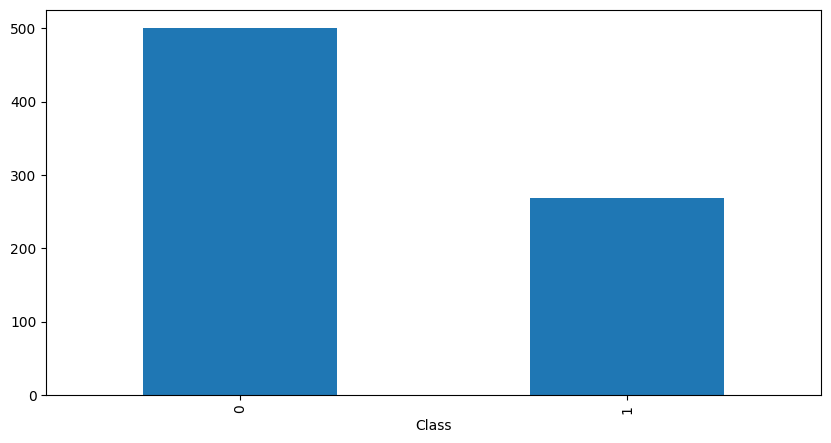

In [15]:
grouped_data = data.groupby('Class')

counts = grouped_data.Class.value_counts()
print(counts)
print(type(counts))
print(counts.plot(kind='bar', figsize=(10, 5)))

We can see that there are nearly twice as many instances of one class as the other. This moderate imbalance might still be okay, but it’s important to keep in mind when training models.

### Correlations

Correlation helps us understand whether two things are connected—and if so, how strongly.

For example, think about ice cream sales and the weather. On hot days, people tend to buy more ice cream, right? That’s a *positive correlation*—as the temperature goes up, so do ice cream sales.

Now imagine something like ice cream sales and rainy days. You might find that sales drop when it rains—that would be a *negative correlation*.

If there’s *no clear pattern* between two things (like shoe size and how many cups of tea someone drinks), the correlation would be close to zero.

In data analysis, we can use a simple command called `.corr()` in Python to check these kinds of relationships between different columns in our dataset. It gives us a number between -1 and 1 to show the strength and direction of the connection.

                 Pregnancy_Count  Glucone_conc  Blood_pressure  Skin_thickness   Insulin       BMI       DPF       Age     Class
Pregnancy_Count         1.000000      0.129459        0.141282       -0.081672 -0.073535  0.017683 -0.033523  0.544341  0.221898
Glucone_conc            0.129459      1.000000        0.152590        0.057328  0.331357  0.221071  0.137337  0.263514  0.466581
Blood_pressure          0.141282      0.152590        1.000000        0.207371  0.088933  0.281805  0.041265  0.239528  0.065068
Skin_thickness         -0.081672      0.057328        0.207371        1.000000  0.436783  0.392573  0.183928 -0.113970  0.074752
Insulin                -0.073535      0.331357        0.088933        0.436783  1.000000  0.197859  0.185071 -0.042163  0.130548
BMI                     0.017683      0.221071        0.281805        0.392573  0.197859  1.000000  0.140647  0.036242  0.292695
DPF                    -0.033523      0.137337        0.041265        0.183928  0.185071  0.14064

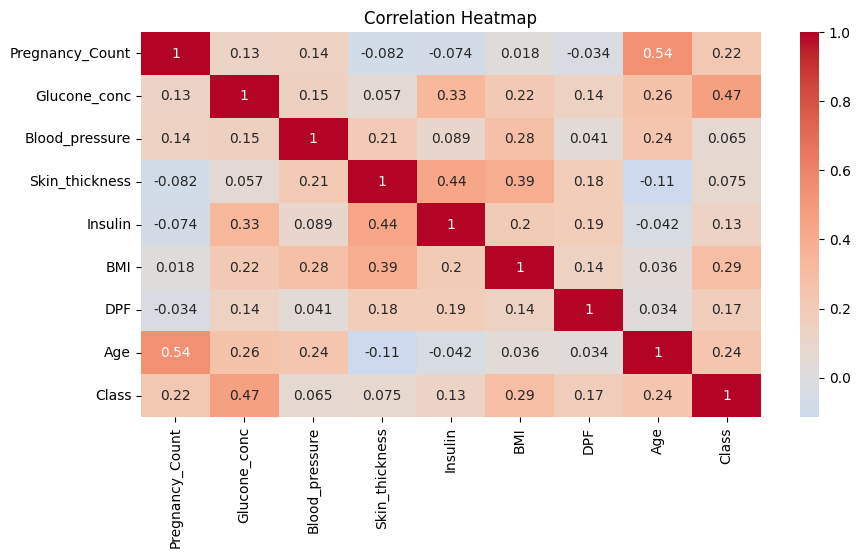

In [26]:
correlations = data.corr(method='pearson')

print(correlations.to_string())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('Correlation Heatmap')
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.show()


Look out for correlation values close to 1.0 or -1.0—these suggest a strong relationship between two variables. If two columns are very strongly linked, they might be telling you almost the same thing. In that case, you may not need to keep both, as it could add unnecessary repetition to your analysis or confuse your model.

### Skew

Skew tells us how *symmetrical* our data is—or in simple terms, whether it leans to one side. Ideally, many datasets follow a “normal” or *bell-shaped* curve, where most values sit around the middle, and there are fewer values at the low and high ends. This is called a *normal distribution*.

But real-world data is often not so neat. That’s where *skew* comes in:

- A *skew close to 0* means the data is fairly balanced—no strong lean to either side.
- A *positive skew* (right-skewed) means the tail of the data stretches out to the right. This happens when there are a few much larger values than the rest—for example, with salaries in a company where a handful of executives earn far more than everyone else.
- A *negative skew* (left-skewed) means the tail stretches out to the left. This happens when a few values are *much lower* than the rest. For example, imagine you're looking at the age at which people retire. Most people might retire around 65, but a small number retire much earlier—maybe in their 40s or 50s—because of early pensions or financial independence. Those few very early retirements pull the distribution to the left, creating a *negative skew*.

Why does skew matter? Because many analysis tools and machine learning models assume your data is roughly symmetrical (normally distributed). If it’s heavily skewed, those assumptions might break down, leading to misleading results. 

In that case, you might need to adjust the data using techniques like log transformations or other methods to bring it closer to a normal shape.

Pregnancy_Count    0.901674
Glucone_conc       0.173754
Blood_pressure    -1.843608
Skin_thickness     0.109372
Insulin            2.272251
BMI               -0.428982
DPF                1.919911
Age                1.129597
Class              0.635017
<class 'pandas.core.series.Series'>
Axes(0.125,0.11;0.775x0.77)


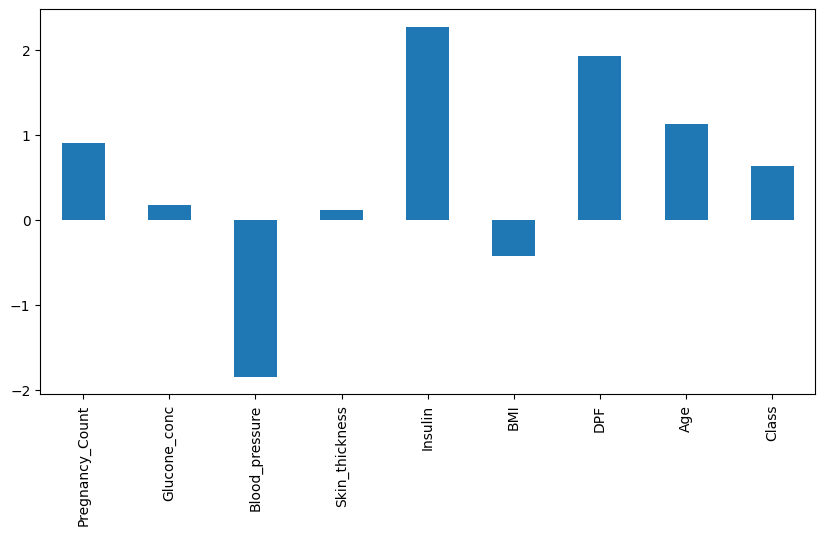

In [ ]:
skew = data.skew()

print(skew.to_string())
print(type(skew))
print(skew.plot(kind='bar', figsize=(10, 5)))

# The skew value of -1.843608 for Blood_pressure indicates a negative (left) skew in the data distribution.
# This means:
# 1. The tail of the distribution extends to the left
# 2. There are some unusually low blood pressure values pulling the distribution in that direction
# 3. The median blood pressure is higher than the mean
# 4. Most blood pressure values are clustered on the higher end of the scale
# 
# Looking at the descriptive statistics from earlier:
# - Mean blood pressure: 69.11
# - Median (50th percentile): 72.00
# - This confirms the negative skew as the median is higher than the mean


We see which attributes are skewed and might benefit from transformations (e.g., log transform).

## Visualisation

Visualisations are one of the most powerful tools in data analysis. They allow you to *see* patterns, trends, and problems in your data that might be hard to spot just by looking at numbers in a table. With just a few simple plots, you can quickly get a feel for how your data is distributed, whether there are any outliers, and how different variables relate to each other.

There are two main types of visualisations you’ll use when working with numeric data: *univariate* and *multivariate* plots.

### Univariate Plots

*Univariate* means “one variable.” These types of plots help you understand the distribution of a single column or feature in your dataset. You might use univariate plots to answer questions like:  
- Are most values clustered in one range?  
- Are there extreme values (outliers)?  
- Is the data skewed to one side?

Common univariate plots include:  
- *Histograms* – show how values are spread out over intervals  
- *Box plots* – highlight the median, quartiles, and outliers  
- *Density plots* – give a smoothed version of a histogram

These are great for spotting skew, checking for missing data, or deciding whether you might need to transform or clean a feature.

### Multivariate Plots

*Multivariate* means “more than one variable.” These plots help you explore relationships between two or more features in your data. They can show you things like:  
- Do two features rise or fall together (correlation)?  
- Are there patterns that depend on more than one factor?  
- Are certain values more common for specific groups?

Useful multivariate plots include:  
- *Scatter plots* – show the relationship between two numerical features  
- *Pair plots* – show scatter plots for many variable combinations in one grid  
- *Heatmaps* – often used to show correlation between features  
- *Coloured or faceted plots* – allow you to add a third variable using colour or small multiples (e.g. scatter plot coloured by category)

These plots are especially useful when you're preparing data for machine learning, as they can highlight which features are likely to be useful for prediction, and which might be redundant or highly correlated.

### Univariate plots

#### Histograms

A *histogram* is a simple but powerful way to understand how your data is distributed. It works by dividing the range of values into equal-sized groups, called *bins*, and then showing how many data points fall into each one.

Think of it like sorting test scores into grade bands—0–10, 10–20, 20–30, and so on—and then counting how many people scored within each band.

Histograms help answer questions like:
- Are most values close together or spread out?
- Does the data have one clear peak (called a *mode*) or several?
- Are there any gaps or outliers?
- Is the distribution symmetrical, or is it skewed to one side?

For example, if you're looking at people’s ages, a histogram can quickly show whether most people fall into a certain age group, or if the ages are spread fairly evenly across the range.

Histograms are especially useful for:
- Getting a quick sense of the shape of your data
- Identifying skew (leaning to the left or right)
- Spotting unusual values or unexpected patterns

Unlike bar charts (which are used for categorical data), histograms are for *numerical* data and display a continuous range of values:

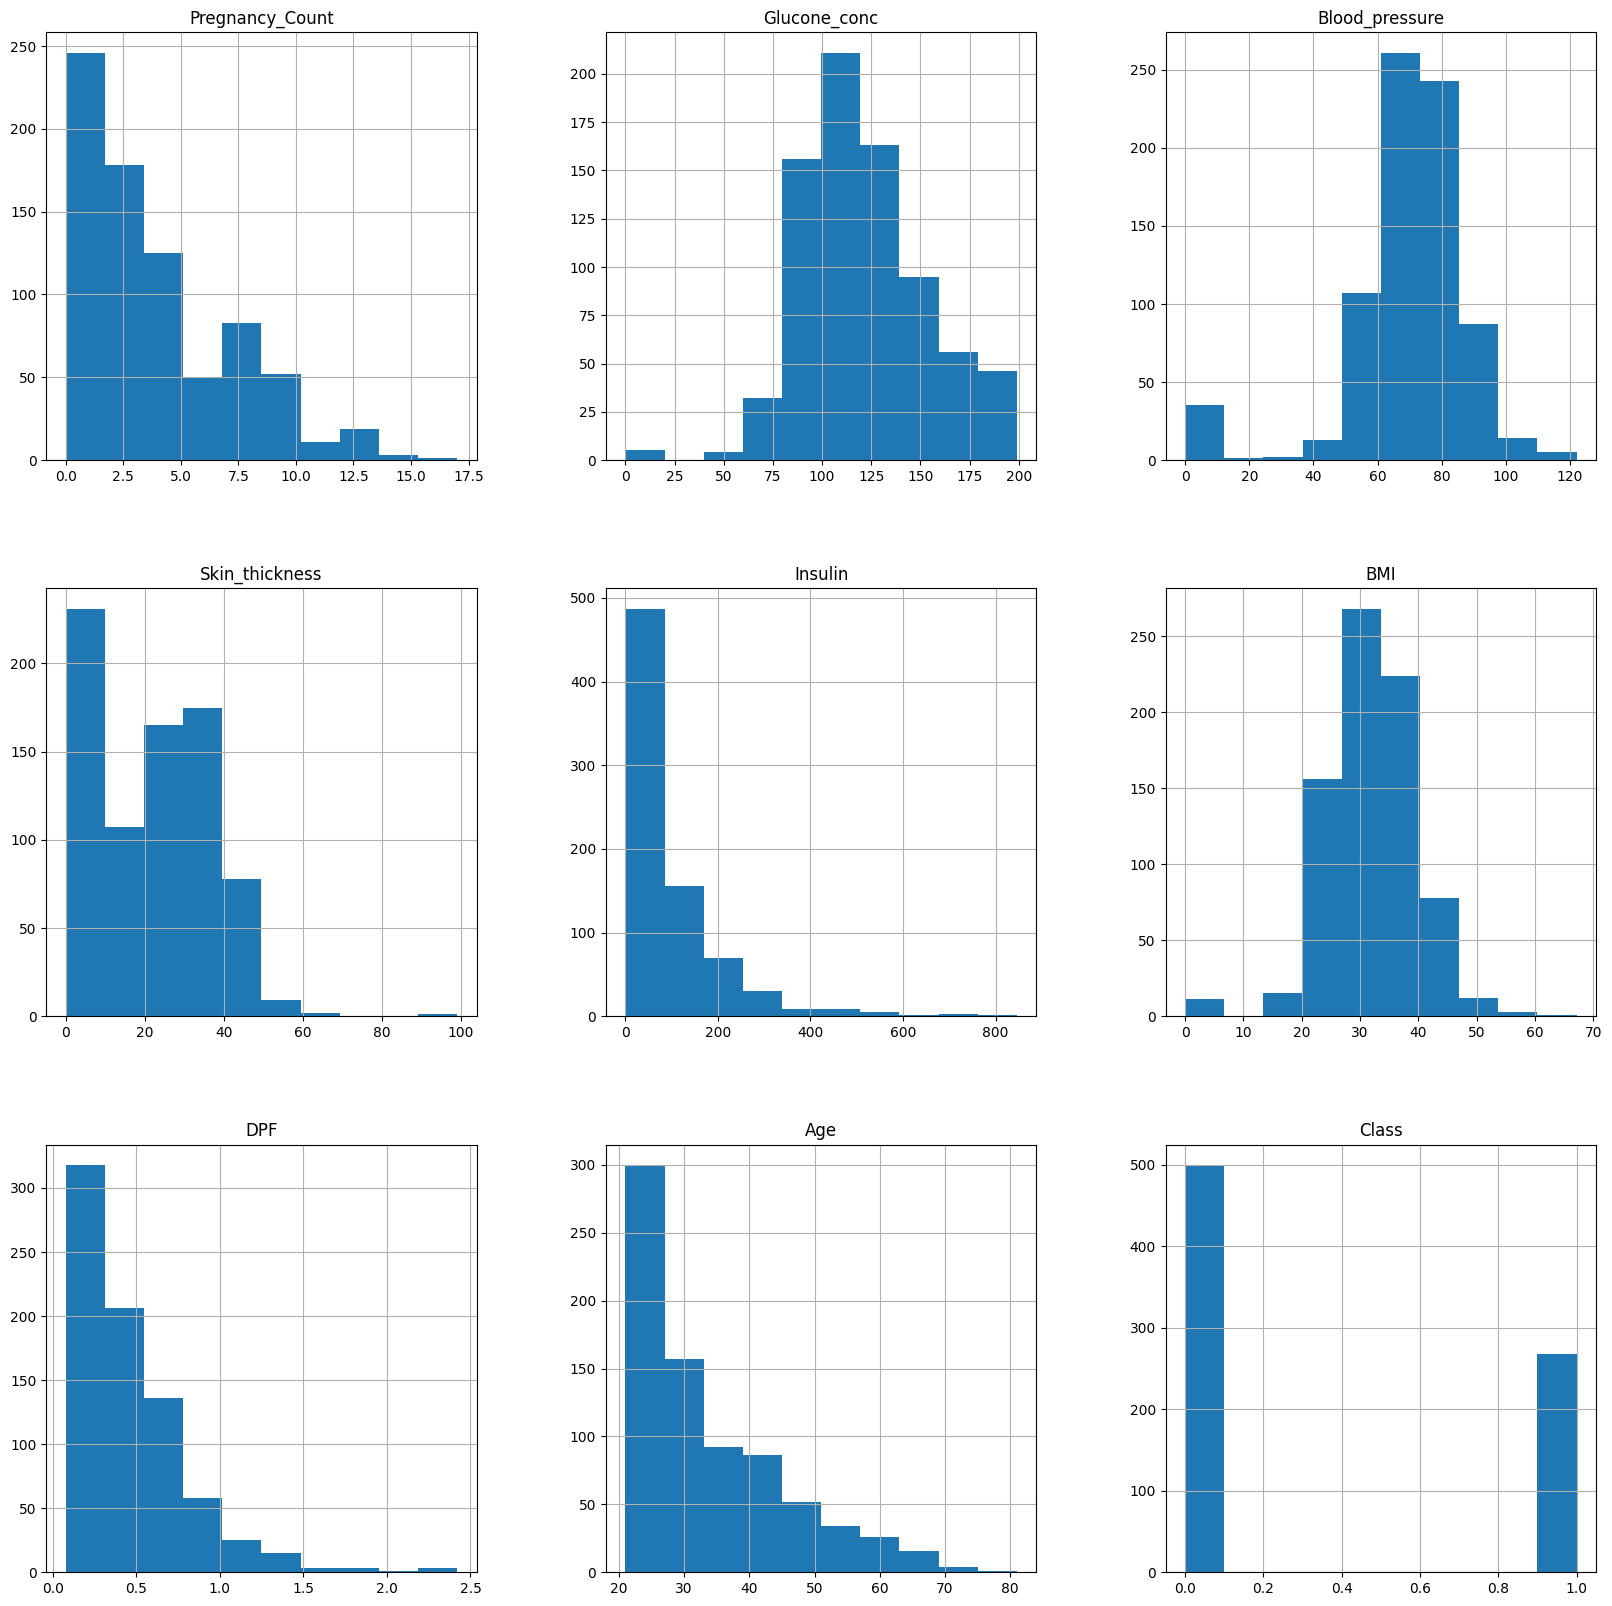

In [40]:
# data.Blood_pressure.hist(figsize=[5, 5])
# data.Blood_pressure.hist(bins=10, figsize=[5, 5])
data.hist(bins=10, figsize=[20, 20])
# data.Pregnancy_Count.hist(bins=range(int(data.Pregnancy_Count.min()), int(data.Pregnancy_Count.max()) + 2), figsize=[5, 5])
plt.show()

#### Density Plots

A density plot is a smooth, curved version of a histogram. Instead of showing bars to count how many data points fall into each bin, it draws a continuous curve that shows where the values in your data are concentrated.

You can think of it like gently draping a smooth sheet over a histogram—it gives you a clearer picture of the *shape* of the data without the blocky steps of bars.

Density plots help answer similar questions to histograms, such as:
- Where are most of the values grouped?
- Is the data symmetrical or skewed?
- Are there one or more peaks (modes) in the data?

They are especially useful when you want:
- A cleaner, more polished view of your data distribution
- To compare multiple groups or datasets on the same graph
- To spot subtle patterns that might be hidden in a histogram

For example, if you wanted to compare the test scores of two different classes, you could plot both curves on the same chart. You’d instantly see which group performed better, whether one group was more spread out, or if both had similar results.

Unlike histograms, which depend on how the bins are set up, density plots aren’t affected by the number or width of bins—making them a more flexible and visually appealing option.

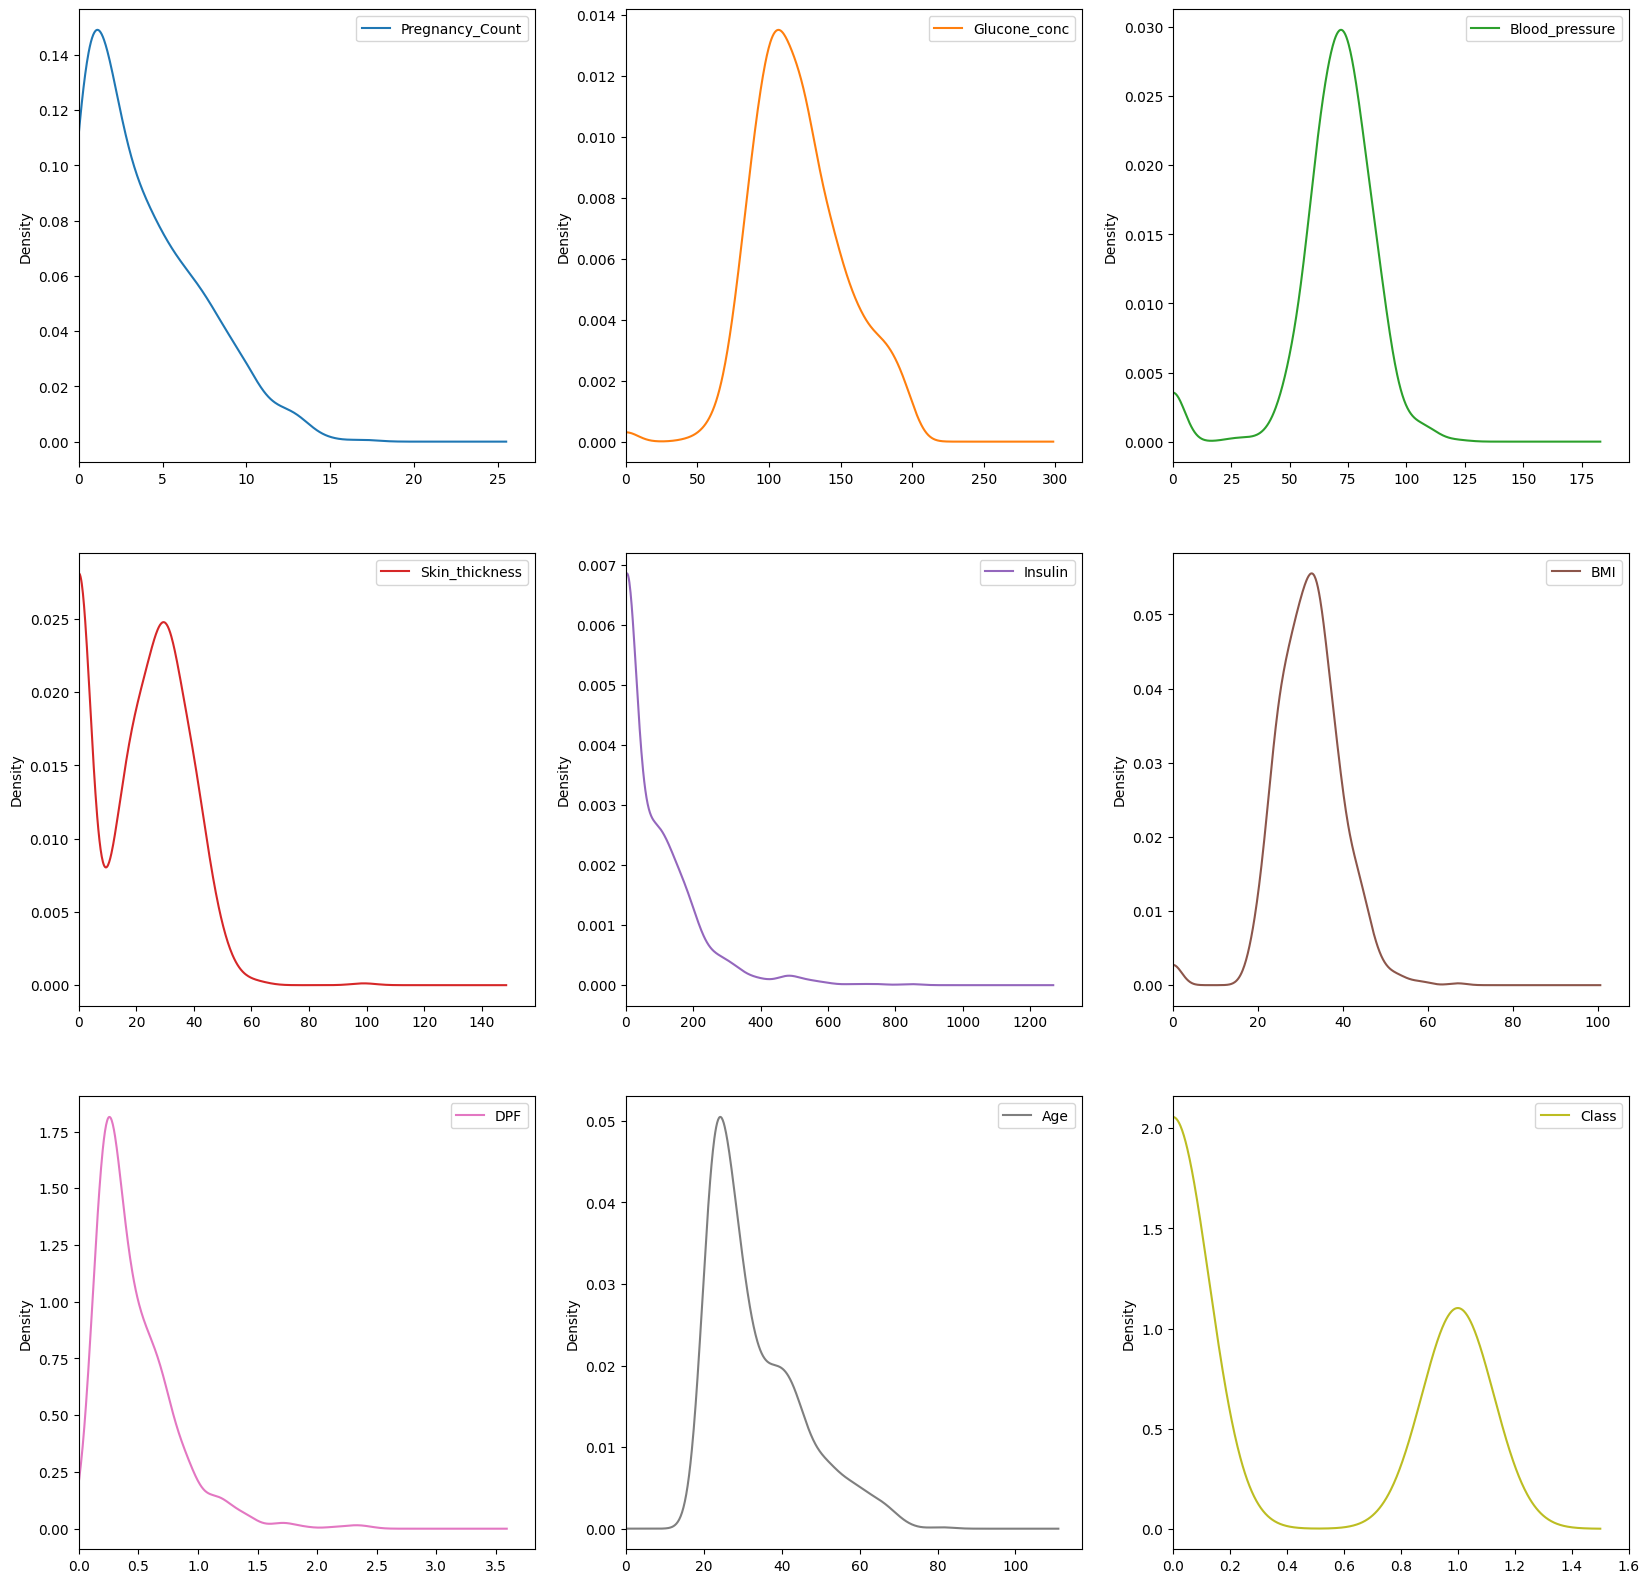

In [49]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=[20, 20], xlim=(0))
plt.show()

# data.Pregnancy_Count.plot(kind='density', figsize=[5, 5], xlim=(1, data.Pregnancy_Count.max()))
# plt.show()

#### Box and Whisker Plots

A *box and whisker plot* (often just called a *box plot*) is a simple way to show how values in a dataset are spread out. It gives you a quick visual summary of key statistics, such as the middle of the data, how spread out it is, and whether there are any unusual values.

Each box plot shows:
- The *median* (the middle value)
- The *lower* and *upper quartiles* (the values that separate the lowest 25% and highest 25% of the data)
- The *“whiskers”*, which show the overall spread of most of the data
- *Outliers*, which are individual points that fall far outside the rest of the data

You can use box plots to:
- Compare distributions across different groups
- Spot outliers quickly
- See whether the data is symmetrical or skewed

For example, imagine you're comparing the daily commute times for people in four different cities. A box plot for each city would let you quickly see which city has the longest or shortest typical journey, which one has the most variation, and whether any cities have a few people with extremely long or short travel times.

Box plots are especially useful when you want to compare many features or groups side by side without cluttering the chart.

In [54]:
pregnancy_count = len(data[data['Pregnancy_Count'] <= 3])
print(f"Number of patients with less than or equal to 3 pregnancies: {pregnancy_count} and percentage: {pregnancy_count / len(data) * 100}%")


Number of patients with less than or equal to 3 pregnancies: 424 and percentage: 55.208333333333336%


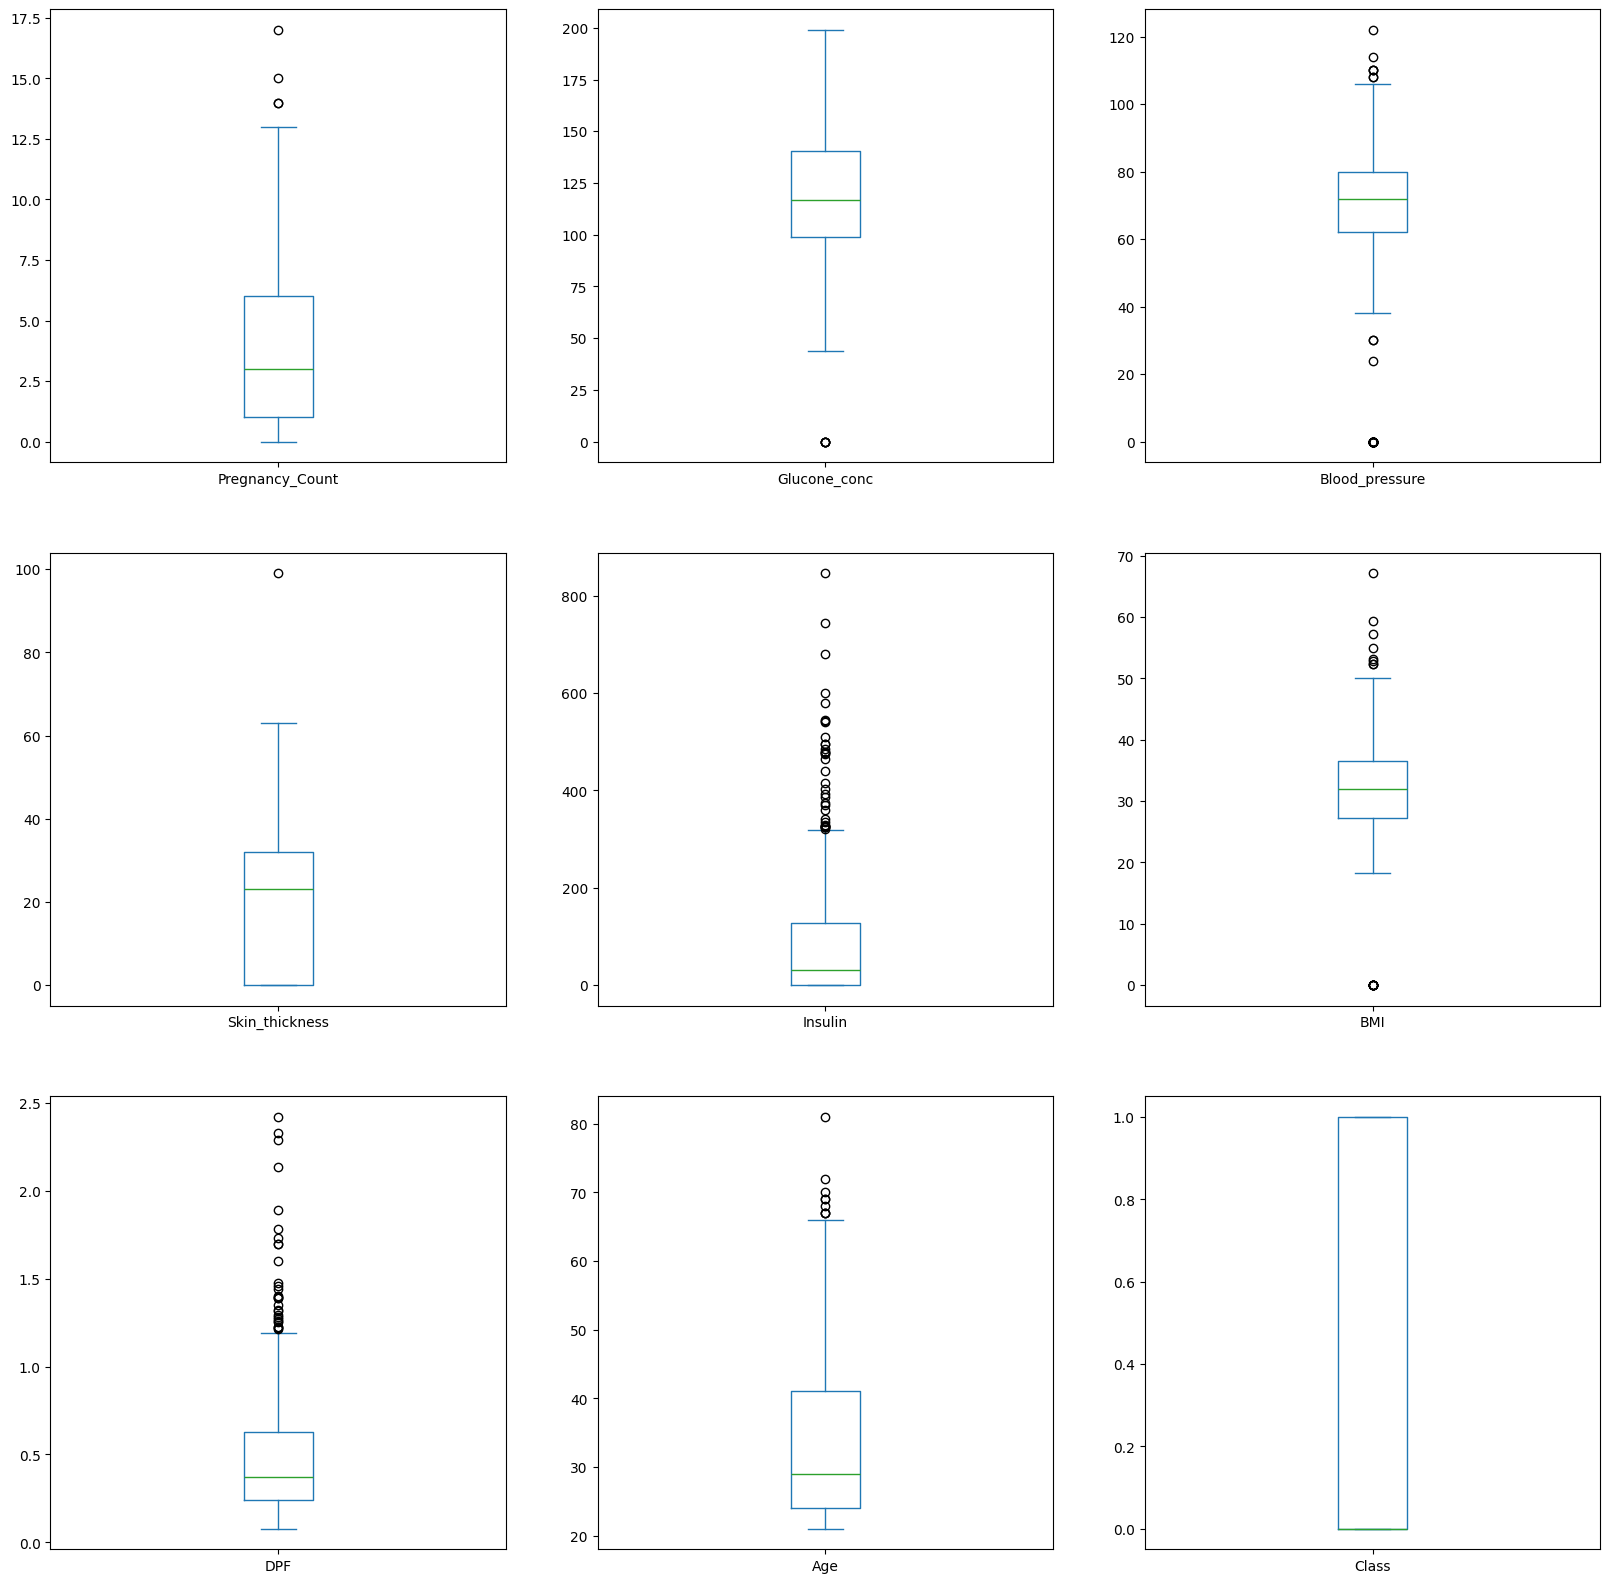

In [50]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=[20, 20])
plt.show()

### Additional visualisations

#### Violin Plots

A *violin plot* combines the best parts of a *box plot* and a *density plot* into one visual. It not only shows key statistics like the *median* and *quartiles*, but also gives you a smooth curve that shows the *shape* of the data—where values are more or less concentrated.

You can think of it like a mirrored density plot with a box plot in the middle. The wider parts of the violin shape show where more data points are clustered, and the thinner parts show where data is sparse.

Violin plots are especially useful when you want to:
- *Compare the full distribution of values across different groups*  
- *Spot skew, multimodal patterns (more than one peak), or outliers*  
- *Get a clearer sense of the spread than a box plot alone can offer*

For example, if you're looking at customer ratings for different food delivery apps, a violin plot could show how those ratings are spread for each one. You might see that one app consistently gets high ratings clustered around 4.5 stars, while another has a wider spread—suggesting that users have more mixed experiences.

This type of plot gives more detail than a simple average or box plot and can help you make better-informed comparisons between groups.

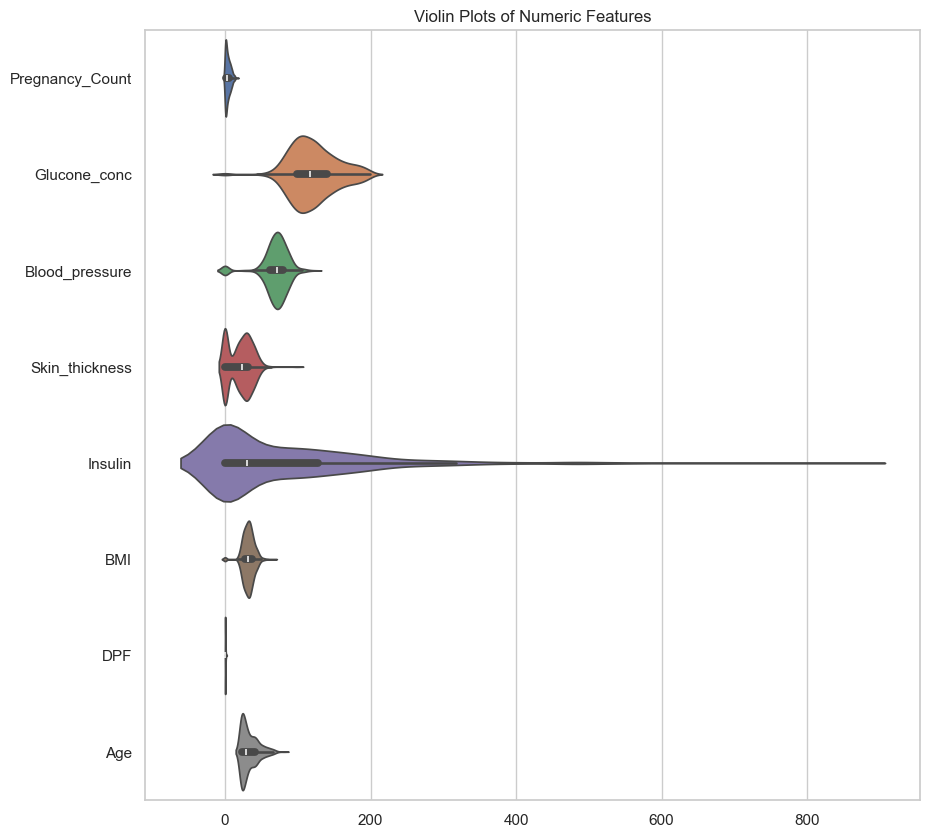

In [63]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 10))

numeric_cols = ['Pregnancy_Count', 'Glucone_conc','Blood_pressure','Skin_thickness','Insulin','BMI','DPF','Age']
sns.violinplot(data=data[numeric_cols], orient='h')
plt.title('Violin Plots of Numeric Features')
plt.show()

### Multivariate Plots

*Multivariate plots* help you explore the relationships between two or more variables at the same time. They’re especially useful for spotting trends, clusters, or patterns that might not be obvious when looking at one variable on its own.

These plots are key when you want to understand how features interact or when preparing data for machine learning models.

#### Correlation Matrix Plot

A *correlation matrix plot* shows how strongly each pair of variables is related, using colours in a *heatmap* to represent the correlation coefficients.

Each cell in the matrix shows a value between -1 and 1:
- *1* means a perfect positive relationship (as one goes up, so does the other)  
- *-1* means a perfect negative relationship (as one goes up, the other goes down)  
- *0* means no clear relationship between the two

These plots help you:
- *Quickly identify strong positive or negative relationships*  
- *Spot features that may be redundant (highly correlated)*  
- *Decide which variables might be useful in a model*

For example, in a dataset about housing, you might see a strong positive correlation between house size and price, and a negative correlation between distance to the city centre and price. A correlation matrix makes these patterns easy to see at a glance.

[Text(0, 0, '#Preg'),
 Text(0, 1, 'Gluco'),
 Text(0, 2, 'BloodP'),
 Text(0, 3, 'Skin_Th'),
 Text(0, 4, 'Insulin'),
 Text(0, 5, 'BMI'),
 Text(0, 6, 'DPF'),
 Text(0, 7, 'Age'),
 Text(0, 8, 'Class')]

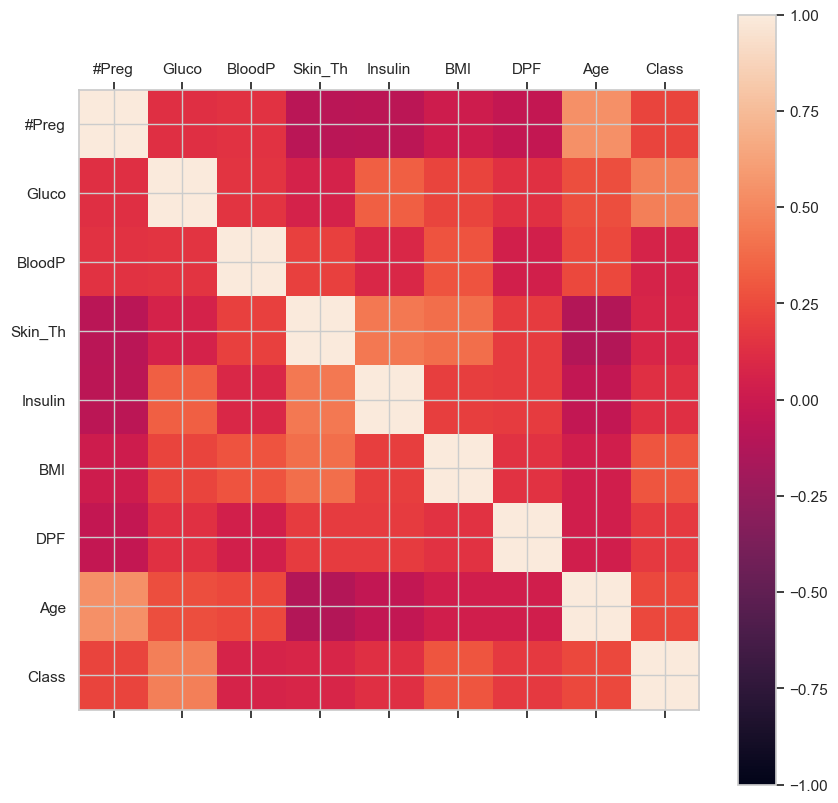

In [64]:
correlations = data.corr()

fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(111)
# Let me explain what this line means:

# The line `ax = fig.add_subplot(111)` creates a subplot in the figure. The numbers `111` represent:
# - First `1`: Number of rows in the subplot grid
# - Second `1`: Number of columns in the subplot grid  
# - Third `1`: The position of this subplot in the grid (first position)

# So `111` means "create a single subplot that takes up the entire figure". It's equivalent to creating a 1x1 grid with one subplot.

# Here's the same code with a more explicit alternative:
# ax = fig.add_subplot(1, 1, 1)


# This line creates a heatmap visualization of the correlation matrix:
# - ax.matshow() creates a matrix-style plot
# - correlations contains the correlation coefficients between all numeric variables
# - vmin=-1 sets the minimum value for color scaling (perfect negative correlation)
# - vmax=1 sets the maximum value for color scaling (perfect positive correlation)
# - The resulting cax object is used later to add a colorbar
cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)

# Create tick positions from 0 to 8 (9 total positions) for both x and y axes
ticks = np.arange(0, 9, 1)  # Creates array [0,1,2,3,4,5,6,7,8]

# Set the tick positions on both axes
ax.set_xticks(ticks)  # Places ticks at positions 0-8 on x-axis
ax.set_yticks(ticks)  # Places ticks at positions 0-8 on y-axis

short_names = ['#Preg','Gluco','BloodP','Skin_Th','Insulin','BMI','DPF','Age','Class']

ax.set_xticklabels(short_names)
ax.set_yticklabels(short_names)

And a simpler version without custom tick labels:

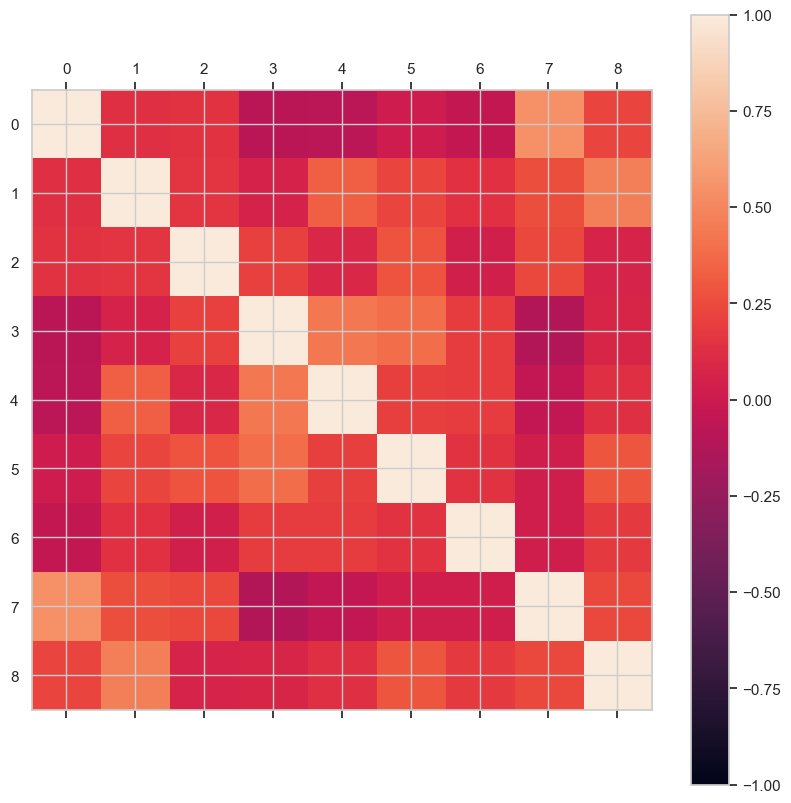

In [65]:
fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)

#### Scatter Plot Matrix

A *scatter plot matrix* (also called a *pair plot*) is a grid of scatter plots that shows how each pair of numerical features in your dataset relates to one another.

Each cell in the grid is a scatter plot that compares two different features. This makes it easy to spot patterns, trends, or clusters that might not be visible when looking at just one or two features on their own. Scatter plot matrices are useful for:
- *Visualising relationships between many features at once*  
- *Detecting linear or non-linear trends*  
- *Identifying clusters or groupings in the data*  
- *Spotting outliers that don’t follow the general pattern*

For example, if you're analysing data from a fitness tracker, a scatter plot matrix might show that *step count* and *calories burned* are positively related (as one increases, so does the other), while *sleep duration* might decrease as *daily Netflix time* goes up. These kinds of patterns can help you understand how lifestyle habits interact.

These plots can become quite large if your dataset has many features, but they’re very helpful for getting an overall sense of how your variables behave together.

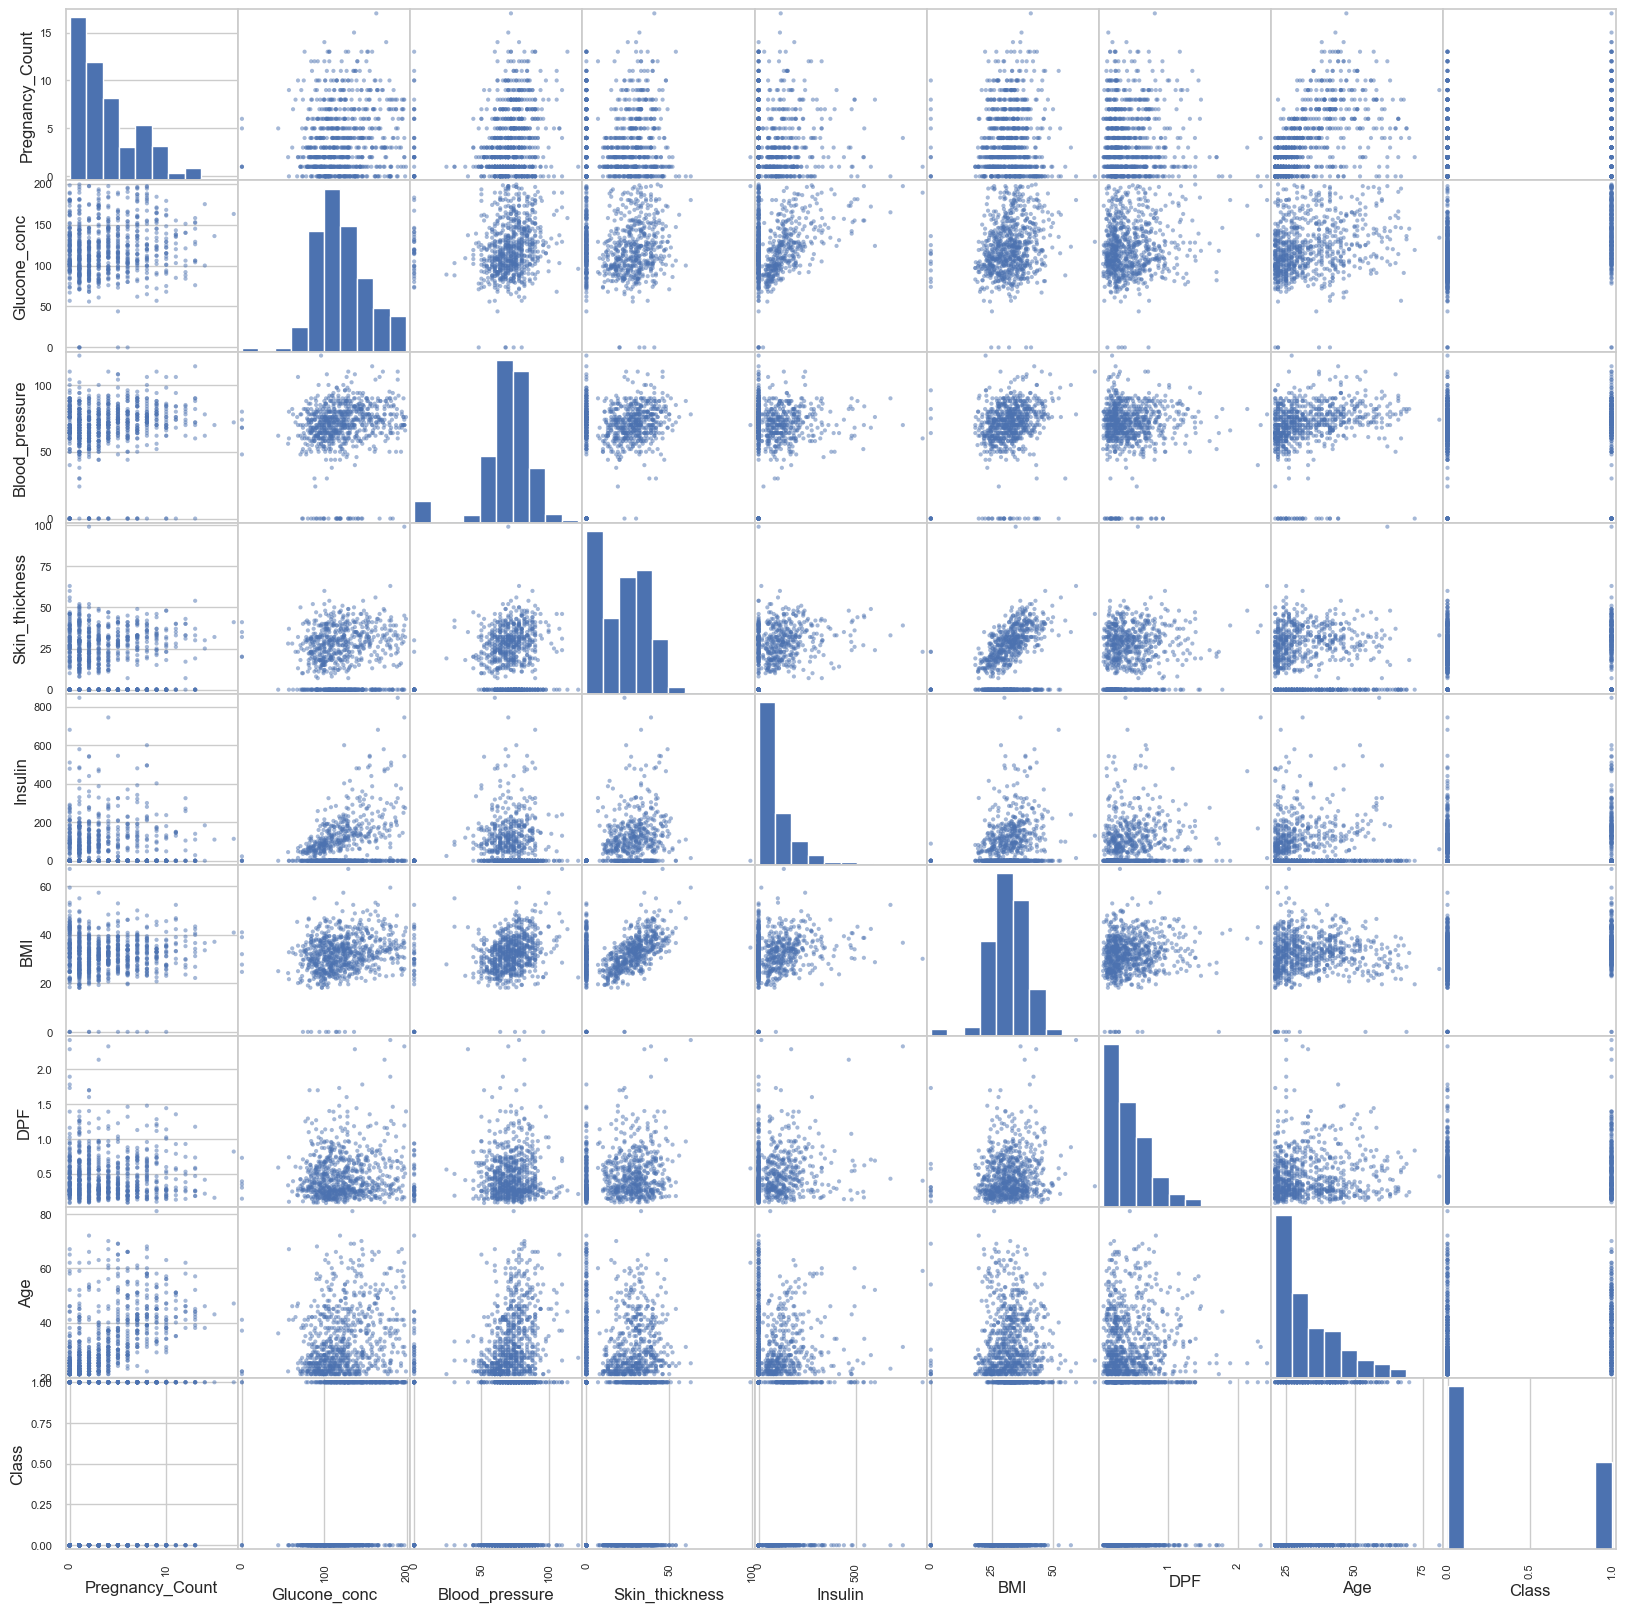

In [69]:
ax = pd.plotting.scatter_matrix(data, figsize=[20, 20])

#### Pair Plot (Seaborn)

A *pair plot* is similar to a *scatter plot matrix*, but with some extra helpful features. It's especially useful when using the Seaborn library in Python. In addition to showing scatter plots for every pair of numerical features, a pair plot can:
- *Colour the data points by category or class* (e.g. product type, user group, or outcome)
- *Include histograms or density curves along the diagonal* to show the distribution of individual features

This makes it easier to spot patterns or groupings that depend on categories in your data.

For example, if you're analysing wearable fitness data, a pair plot could compare things like *steps per day*, *active minutes*, and *sleep duration*, while colouring the points based on *activity level* (e.g. low, medium, high). You might notice that people with higher activity levels also tend to sleep more or have more consistent step counts.

Pair plots are a great tool for getting a quick, all-in-one view of how multiple features interact, especially when categories are involved.

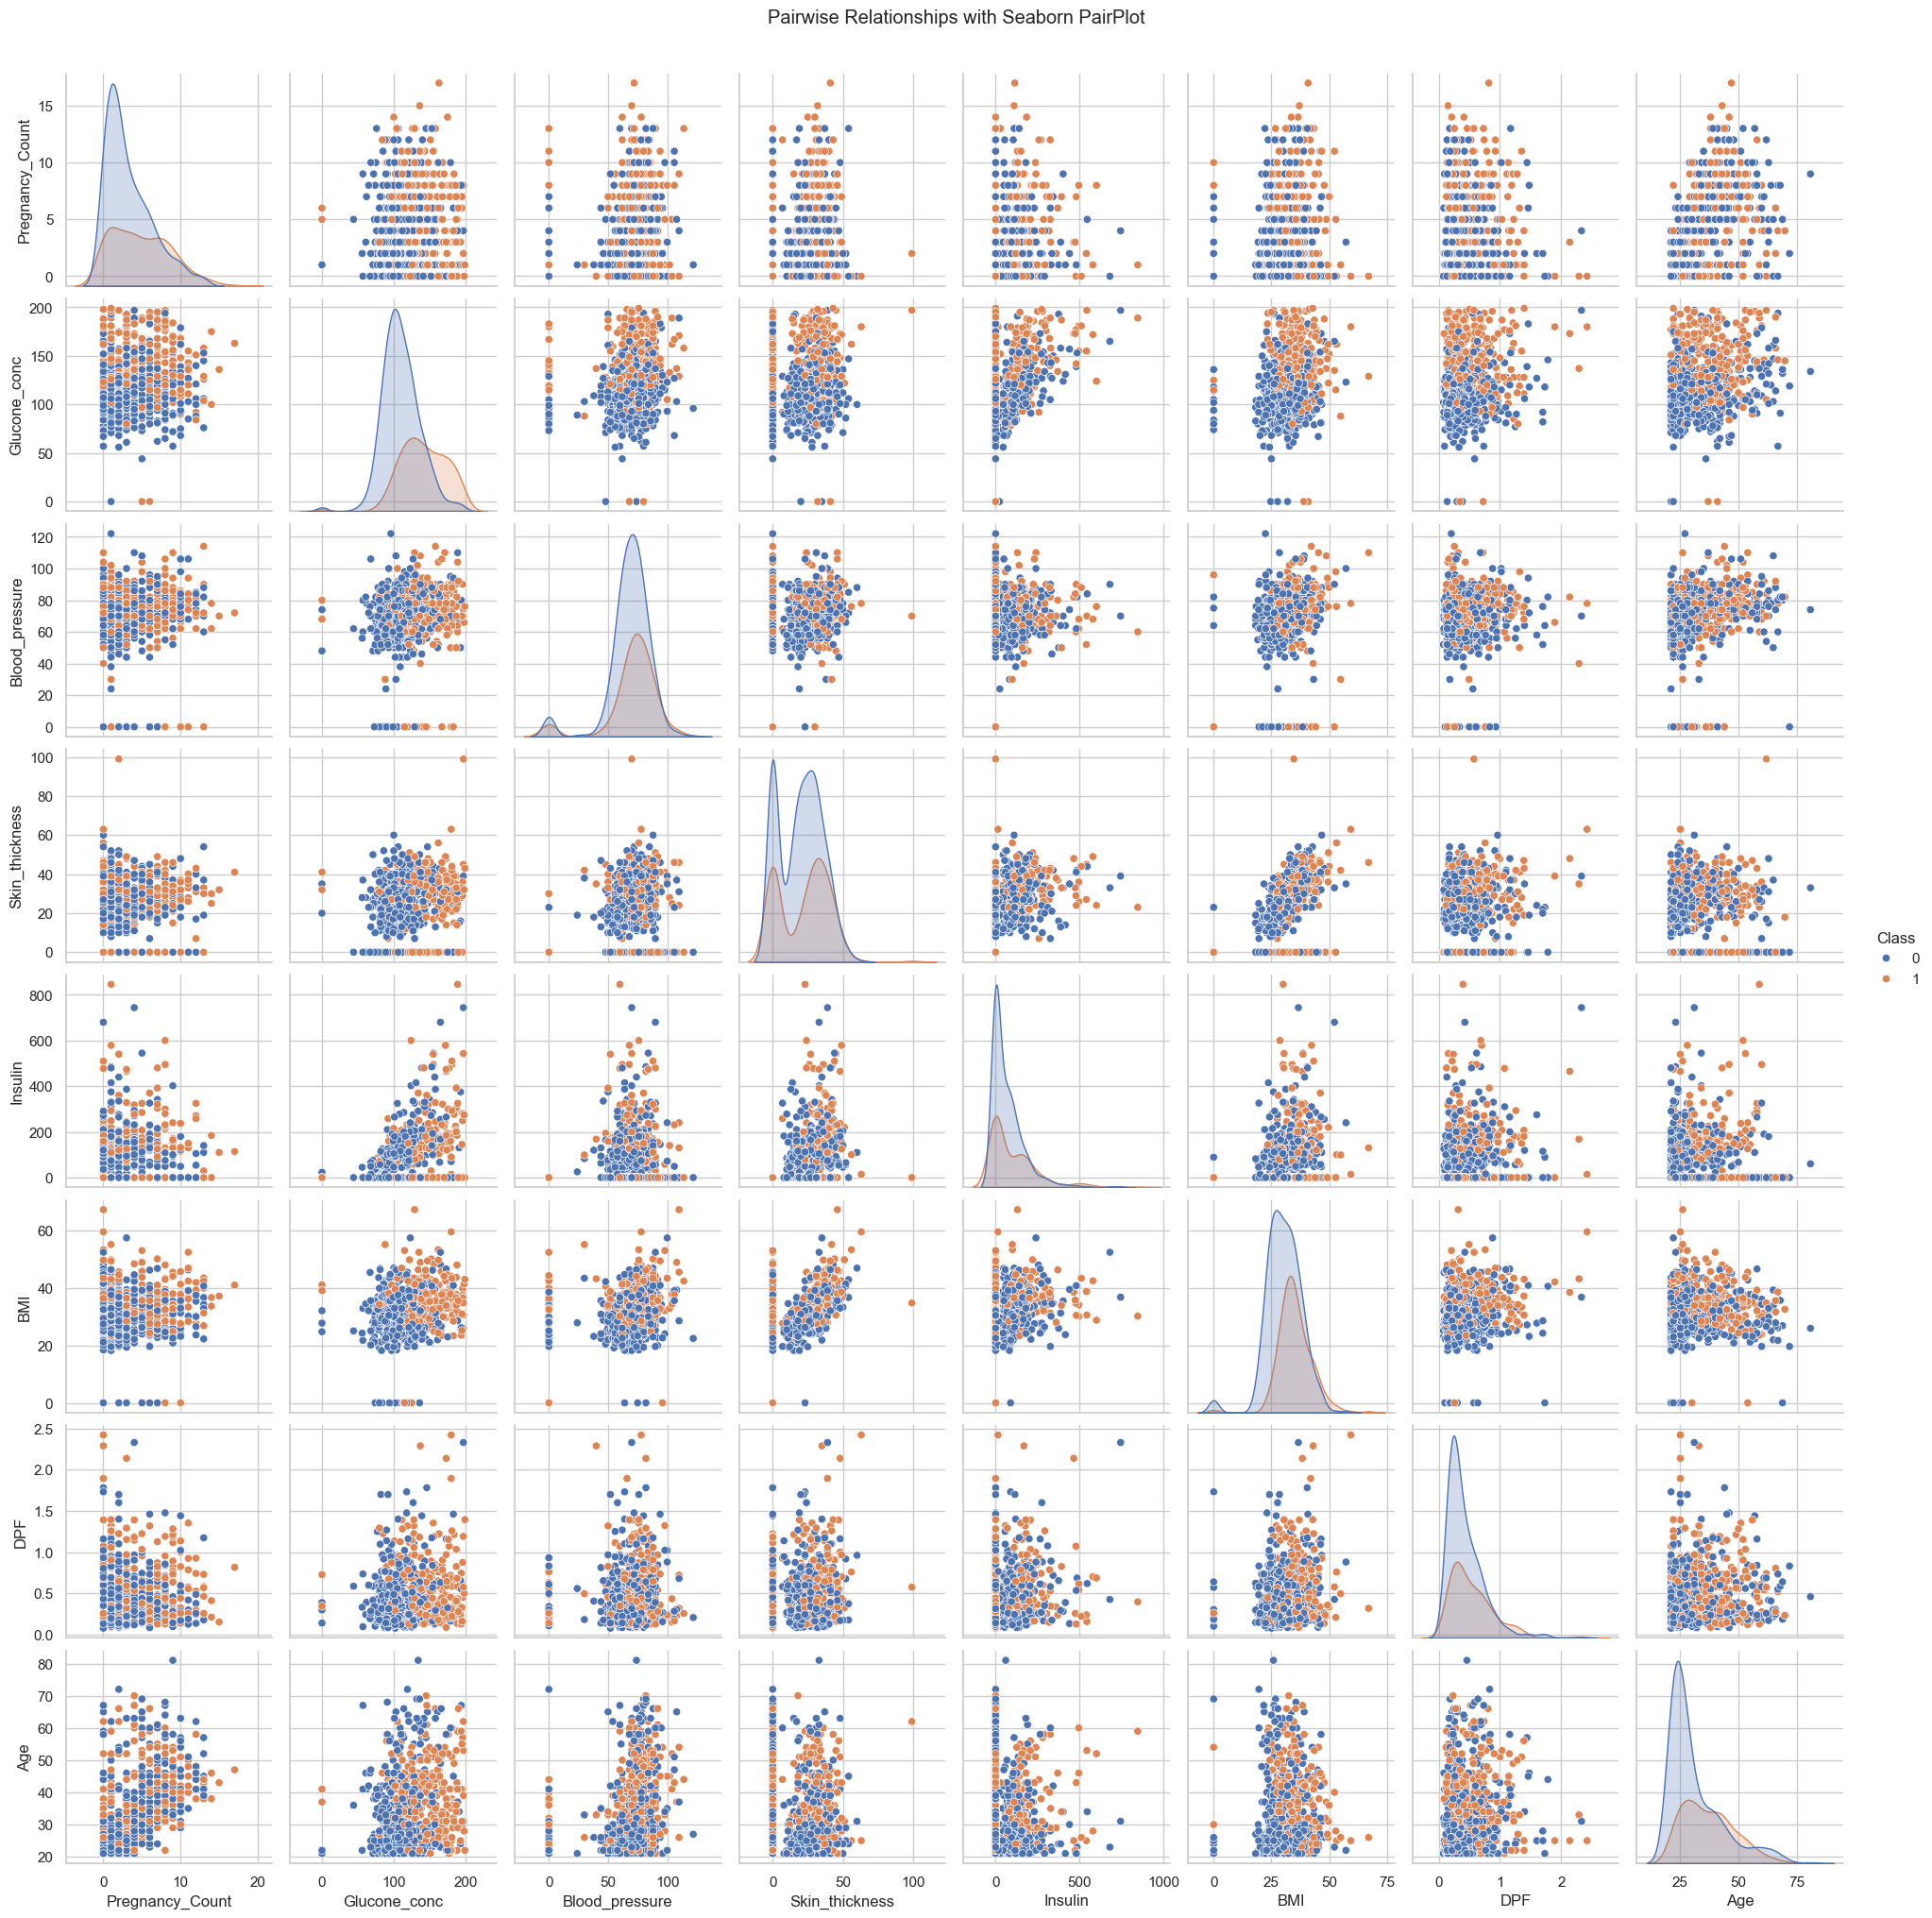

In [70]:
sns.pairplot(data, hue='Class')

plt.suptitle('Pairwise Relationships with Seaborn PairPlot', y=1.02)

plt.show()

#### Distribution Plots

*Distribution plots* show how the values of a single variable are spread out across a range. They help you see where most of the data points fall, and whether the values are concentrated, evenly spread, or skewed in one direction.

These plots often include:
- *Bars* to show how many values fall within certain ranges (like a histogram)  
- *A smooth curve* to highlight the overall shape of the data (like a density plot)

Distribution plots are useful for:
- *Understanding the general shape of your data*  
- *Spotting any unusual peaks or gaps*  
- *Seeing whether values are grouped around a central point or spread out*  

For example, if you’re looking at daily screen time across a group of people, a distribution plot can reveal whether most people use their devices for around the same amount of time, or if some people use them much more or less than others.

These plots are great for quickly getting a feel for a single feature and are often used early in data analysis to spot potential issues or patterns.

In [71]:
print(numeric_cols)

['Pregnancy_Count', 'Glucone_conc', 'Blood_pressure', 'Skin_thickness', 'Insulin', 'BMI', 'DPF', 'Age']


Text(0.5, 1.0, 'Distribution of features')

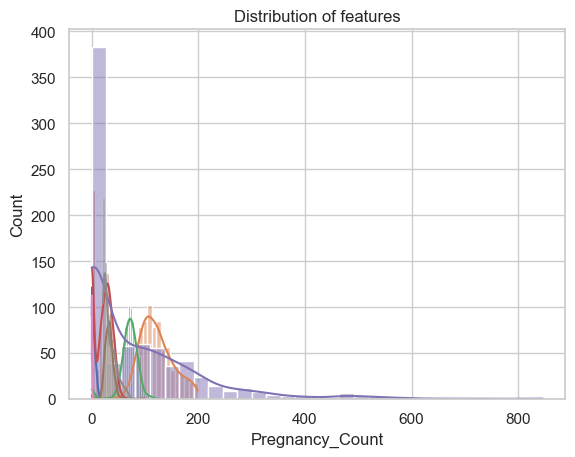

In [74]:
for col in numeric_cols:
    sns.histplot(data[col], kde=True)
    
plt.title(f"Distribution of features")

### What have we learnt?

Visualisation helps us understand what transformations are doing — plots like histograms, box plots, and scatter matrices can reveal whether a transformation has improved the data's structure.

In this practical, we explored how to understand and prepare a tabular dataset before applying any machine learning models. When we combined descriptive statistics and visualisation techniques, we gained valuable insights into the structure, distribution, and relationships within the data. Here’s a summary of what we discussed:

- *Describing the dataset*: We used statistical summaries (like mean, median, and standard deviation) to get a quick overview of each feature. This helped us spot issues such as missing values, outliers, and unusual distributions.

- *Visualising the dataset*: Using histograms, density plots, box plots, and violin plots, we explored how each feature is distributed. We also used correlation heatmaps, scatter matrix plots, and pair plots to examine how features interact with one another.

- *Understanding data quality*: When looking at class imbalance and skew, we identified areas that might require transformation or careful handling during model training.

- *The importance of preprocessing*: These steps are critical for preparing data in a way that helps machine learning models learn more effectively and fairly. Good data understanding leads to better feature selection, more robust models, and more accurate results.

Altogether, these techniques provide a solid foundation for responsible and effective data analysis, helping us make informed decisions before modelling begins.